In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#suspress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/housing.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#I want to see the number of different values of each column
df.nunique()

,0
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


In [7]:
#print the number of rows/columns of the dataset
df.shape

(1460, 81)

In [8]:
#print columns name
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#print basic info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#I can see which columns have nan values
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [11]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [12]:
#I calculate the percentage of NaNs for each column, display the columns with over 40% NaNs and remove them from the dataset
nan_percent = df.isna().mean()
columns_to_drop = nan_percent[nan_percent > 0.4]
print("Στήλες με πάνω από 40% NaN:")
print(columns_to_drop.sort_values(ascending=False))
df= df.drop(columns=columns_to_drop.index)

print("\n Νέο σχήμα του dataset:", df.shape)

Στήλες με πάνω από 40% NaN:
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
dtype: float64

 Νέο σχήμα του dataset: (1460, 75)


In [13]:
# Remove columns that are not needed
df.drop(columns=[  'Id', 'LotFrontage', 'LotShape' , 'Street' , 'LotConfig', 'YearBuilt' , 'RoofStyle', 'RoofMatl', 'ExterCond', 'MasVnrArea' ,
                'BsmtCond' , 'BsmtFinType1' , 'BsmtFinType2' , 'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF' , 'HeatingQC' , 'Electrical' ,
                'LowQualFinSF' , 'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' , 'HalfBath' , 'BedroomAbvGr' , 'KitchenAbvGr' , 'KitchenQual' ,
                'TotRmsAbvGrd' ,  'GarageYrBlt', 'GarageCars' , 'GarageFinish', 'GarageCond', 'GarageQual',  'PavedDrive' ,
                'MoSold', 'YrSold', 'SaleType',  'PoolArea' , 'WoodDeckSF' , 'OpenPorchSF' , 'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' , 'MiscVal' ], inplace=True)

df.head()

,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,Functional,Fireplaces,GarageType,GarageArea,SaleCondition,SalePrice
0,60,RL,8450,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,856,854,1710,Typ,0,Attchd,548,Normal,208500
1,20,RL,9600,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,...,Y,1262,0,1262,Typ,1,Attchd,460,Normal,181500
2,60,RL,11250,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,920,866,1786,Typ,1,Attchd,608,Normal,223500
3,70,RL,9550,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,961,756,1717,Typ,1,Detchd,642,Abnorml,140000
4,60,RL,14260,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,...,Y,1145,1053,2198,Typ,1,Attchd,836,Normal,250000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LandSlope      1460 non-null   object
 6   Neighborhood   1460 non-null   object
 7   Condition1     1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  OverallQual    1460 non-null   int64 
 12  OverallCond    1460 non-null   int64 
 13  YearRemodAdd   1460 non-null   int64 
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  Foundation     1460 non-null   object
 18  BsmtQual       1423 non-null

In [15]:
#Replace nan values of the columns BsmtQual, BsmtExposure, GarageType with the mode of each column
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode().iloc[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode().iloc[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode().iloc[0])

In [16]:
#Convert categorical variables into indicator variables
df = pd.get_dummies(df, drop_first=True)
df.head()
df.shape

(1460, 137)

In [17]:
#Visualizing  Outliers Using Box Plot
#create a box plot
import plotly.express as px
fig = px.box(df, y='SalePrice')

fig.show()

In [18]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df = remove_outliers_iqr(df, 'SalePrice')

In [19]:
#create a box plot
import plotly.express as px
fig = px.box(df, y='SalePrice')

fig.show()

In [20]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,57.487491,10155.280915,5.983560,5.591137,1984.058613,1024.273767,1132.247320,336.476054,1474.413867,0.583274,458.817012,170237.127234
std,42.803603,8324.834198,1.282272,1.118236,20.661160,407.031806,357.318243,421.440524,480.552421,0.631804,204.278673,59230.130817
min,20.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,20.000000,7442.000000,5.000000,5.000000,1966.000000,788.000000,870.500000,0.000000,1119.000000,0.000000,312.000000,129000.000000
50%,50.000000,9317.000000,6.000000,5.000000,1992.000000,973.000000,1069.000000,0.000000,1437.000000,1.000000,471.000000,159500.000000
75%,70.000000,11316.500000,7.000000,6.000000,2003.000000,1251.500000,1346.500000,720.000000,1728.000000,1.000000,573.000000,203500.000000
max,190.000000,164660.000000,10.000000,9.000000,2010.000000,6110.000000,4692.000000,1818.000000,5642.000000,3.000000,1418.000000,340000.000000


In [21]:
# check for correlation
df.corr()


,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.149714,0.066951,-0.070420,0.055086,-0.224965,-0.240781,0.312578,0.099421,-0.033322,...,-0.108845,0.039315,0.079505,0.038157,0.054934,0.015659,0.027924,-0.000668,0.011948,-0.031617
LotArea,-0.149714,1.000000,0.070548,0.004398,0.012715,0.252314,0.307689,0.047520,0.270307,0.280514,...,0.097900,0.002499,0.030846,0.014688,-0.131372,-0.013852,0.013731,-0.007977,0.007900,0.016505
OverallQual,0.066951,0.070548,1.000000,-0.071040,0.532226,0.466350,0.388258,0.289944,0.537984,0.351776,...,0.259160,-0.028225,0.160982,-0.103593,-0.323945,-0.041088,-0.055682,-0.017246,-0.075004,0.248461
OverallCond,-0.070420,0.004398,-0.071040,1.000000,0.093423,-0.151769,-0.132360,0.023791,-0.077649,-0.019609,...,-0.116723,-0.020656,-0.060822,-0.034554,0.174280,-0.040293,-0.039837,-0.025979,0.145815,-0.129157
YearRemodAdd,0.055086,0.012715,0.532226,0.093423,1.000000,0.251765,0.194085,0.132715,0.254245,0.079410,...,0.227066,-0.041167,0.165848,-0.063429,-0.296678,-0.039042,-0.023763,-0.044365,-0.079655,0.289541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.015659,-0.013852,-0.041088,-0.040293,-0.039042,-0.057185,-0.036841,-0.014042,-0.040342,-0.049452,...,0.011403,-0.006113,-0.012564,-0.004309,-0.003104,1.000000,-0.004767,-0.006449,-0.121037,-0.014371
SaleCondition_Alloca,0.027924,0.013731,-0.055682,-0.039837,-0.023763,-0.044952,0.068567,-0.037560,0.016989,-0.018145,...,-0.019178,0.061648,-0.020888,0.094064,-0.000634,-0.004767,1.000000,-0.010721,-0.201223,-0.023892
SaleCondition_Family,-0.000668,-0.007977,-0.017246,-0.025979,-0.044365,0.031367,0.034509,-0.025763,0.001639,0.003189,...,-0.024797,-0.013749,-0.001181,-0.009691,0.019962,-0.006449,-0.010721,1.000000,-0.272212,-0.032322
SaleCondition_Normal,0.011948,0.007900,-0.075004,0.145815,-0.079655,-0.111187,-0.106688,0.051209,-0.036702,0.056802,...,-0.026439,-0.052346,-0.017815,-0.036895,0.061305,-0.121037,-0.201223,-0.272212,1.000000,-0.606644


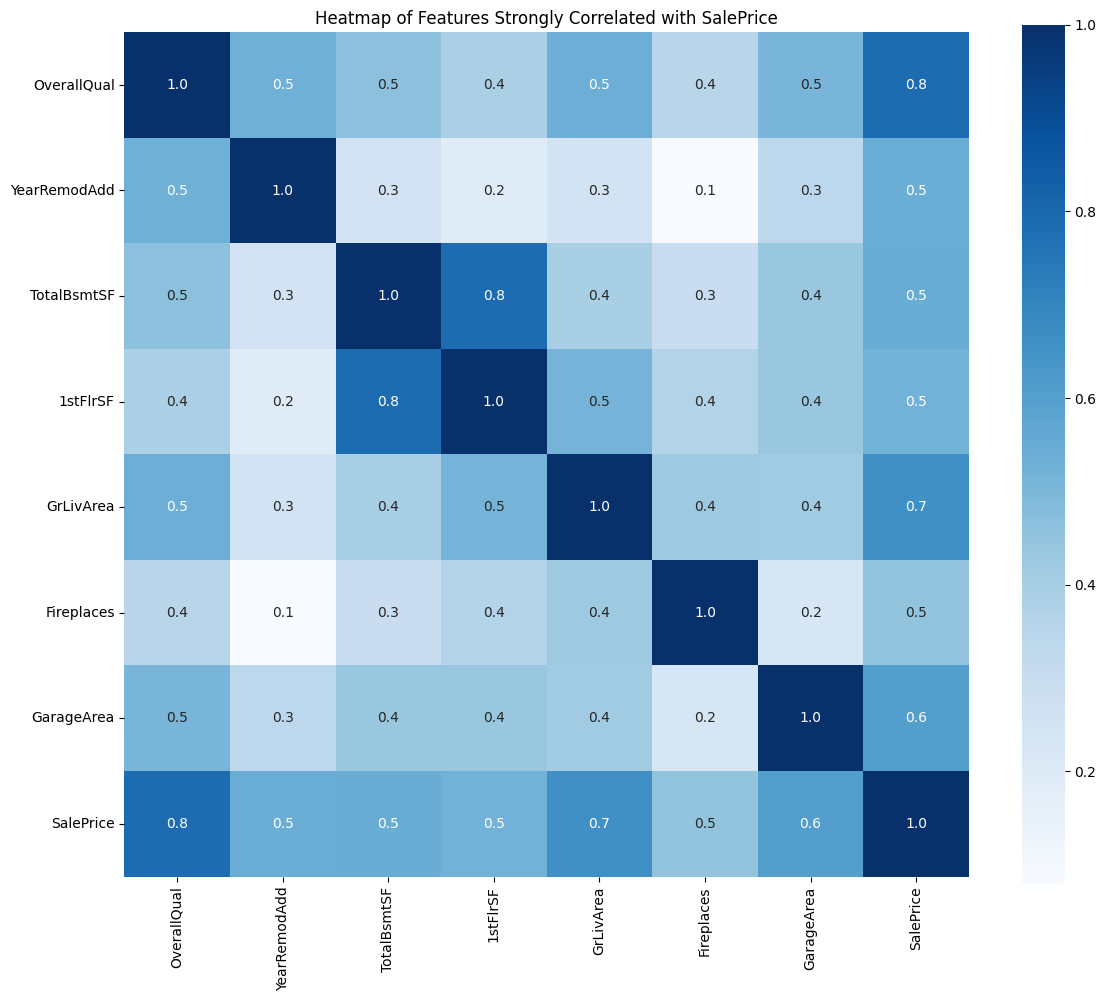

📌 Columns strongly correlated with SalePrice:
['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageArea', 'SalePrice']


In [22]:
#  Get columns with correlation > 0.4 with SalePrice and Plot  a heatmap
# Select numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Get columns with correlation > 0.4 with SalePrice
strong_corr = correlation_matrix["SalePrice"].abs()
high_corr_cols = strong_corr[strong_corr > 0.4].index

# Filter the correlation matrix to only those columns
corr_subset = correlation_matrix.loc[high_corr_cols, high_corr_cols]

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, cmap="Blues", fmt=".1f", square=True)
plt.title("Heatmap of Features Strongly Correlated with SalePrice")
plt.tight_layout()
plt.show()

# Optional: print the list of those columns
print("📌 Columns strongly correlated with SalePrice:")
print(high_corr_cols.tolist())

In [23]:
# Train the model
# Define target variable and features
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [24]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R² Score:", train_score)
print("Testing R² Score:", test_score)

Training R² Score: 0.8884696104640065
Testing R² Score: 0.8622531225546743


In [25]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Mean Squared Error: 548231011.7373145
RMSE: 23414.333467714056
R² Score: 0.8622531225546743


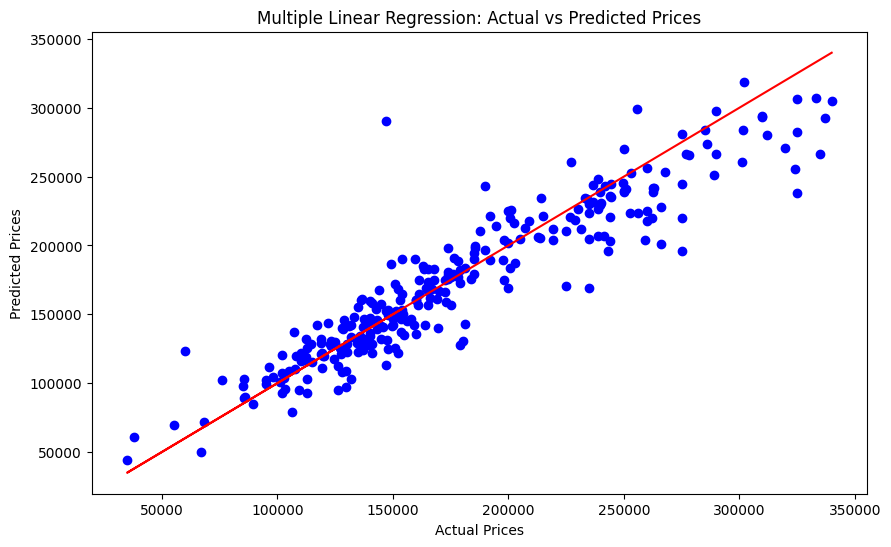

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.show()

In [27]:
#apply lasso and Ridge to simplify our model
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)
lasso_reg.score(X_train, y_train)

0.8430060988171807

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
lasso_predictions = lasso_reg.predict(X_test)
lasso_mse2 = mean_squared_error( y_test, lasso_predictions)
lasso_r22 = r2_score( y_test, lasso_predictions)

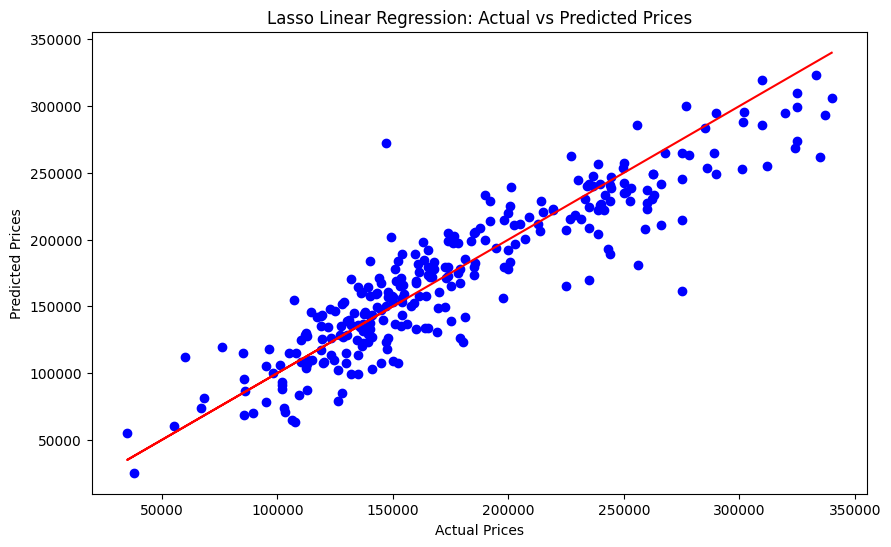

Mean Squared Error: 685988383.2128811, R^2 Score: 0.8276406191399145


In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Linear Regression: Actual vs Predicted Prices')
plt.show()
print(f"Mean Squared Error: {lasso_mse2}, R^2 Score: {lasso_r22}")

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)
ridge_reg.score(X_train, y_train)

0.8498444358249029

In [31]:

ridge_predictions = ridge_reg.predict(X_test)
ridge_mse2 = mean_squared_error(y_test, ridge_predictions)
ridge_r22 = r2_score(y_test, ridge_predictions)

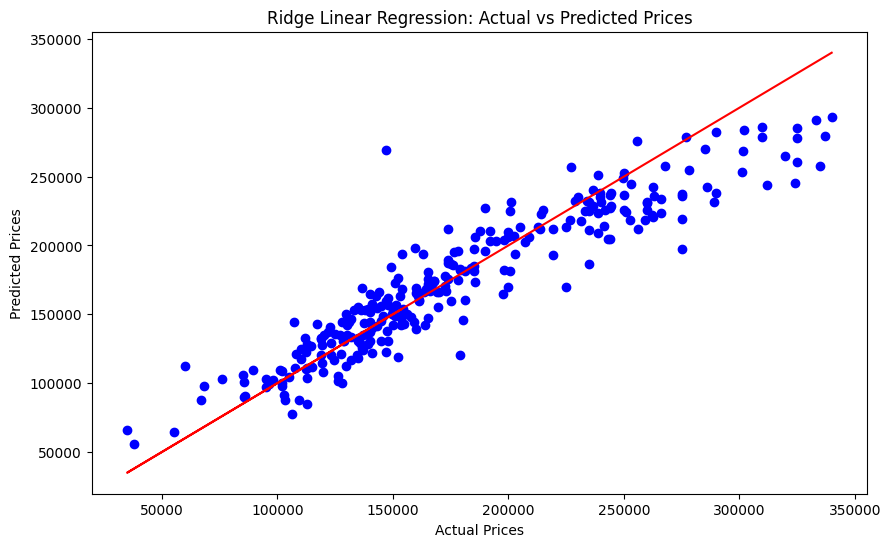

Mean Squared Error: 574847617.291677, R^2 Score: 0.8555655141837271


In [32]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_predictions, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Linear Regression: Actual vs Predicted Prices')
plt.show()
print(f"Mean Squared Error: {ridge_mse2}, R^2 Score: {ridge_r22}")

In [33]:
# Test our model
# Select 5 random rows using pandas' sample function
df_sample = X_test.sample(n=5, random_state=15)

# Get corresponding actual prices
y_sample_actual = y_test.loc[df_sample.index]

# Predict prices for the selected samples
y_sample_pred = model.predict(df_sample)

# Create a DataFrame to compare actual vs predicted prices
df_comparison_alt = pd.DataFrame({
    'Actual Price': y_sample_actual.values,
    'Predicted Price': y_sample_pred
}, index=y_sample_actual.index)

# Display results
df_comparison_alt

,Actual Price,Predicted Price
379,179000,182467.596949
1201,197900,204218.824935
1264,181000,143088.870959
567,214000,234391.747950
1271,185750,198147.169149


In [ ]:
#After exploring the file and studying which columns I didn't need to predict the price of the house, I removed them.
#I also removed the columns that had nan values ​​over 40% of the dataset. I replaced all the nan values ​​they had sent, checked for duplicate rows and outliers.
#Then I looked at the correlation of the columns and applied Multiple Linear Regression.

In [ ]:
# The multiple linear regression achieved an R² Score of approximately 86% on testing dataset and 88% on training dataset.
#The model appears to be performing well both on the training and testing datasets, with a slight reduction in predictive power when generalizing to new data.
#This slight drop may indicate some overfitting, but it's not severe. The model still performs well on unseen data